In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("titanic_train.csv")

In [4]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


OBSERCATION-1(JUST BY LOOKING AT THE DATASET)
Passengerid,NAME,Ticket,Cabin are not going to impact our model and have infinitesimally small  significance in determing the output we have to drop these columns from our dataset


In [5]:
df=df.drop(['Unnamed: 0','PassengerId','Name','Ticket','Cabin'],axis=1)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


DESCRIBING THE DATA (MEAN,STD,MIN,25%,50%,75%,MAX)

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PLOTTING THE HEATMAP FOR THE DESCIPRTION

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200



---HEATMAP----





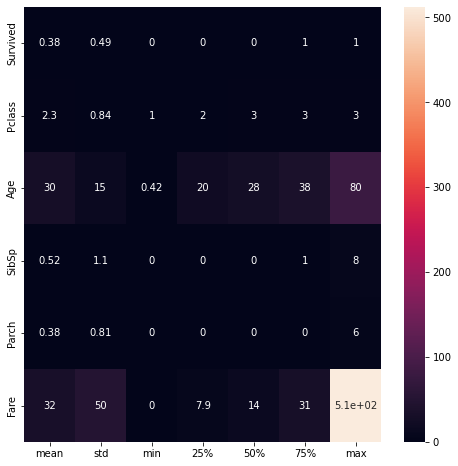

In [8]:
print(df.describe())
print("\n\n\n---HEATMAP----\n\n\n")
plt.figure(figsize=(8,8))
sns.heatmap(df.describe()[1:].T,annot=True,annot_kws={'size':10})
plt.show()

OBSERVATION-2)
*AGE HAVE SOME NULL VALUES
*FARE SEEMS TO HAVE SOME OUTIERS
*AGE LOOKS NORMALLY DISTRIBUTED AS OF VALUES 


CHECKING FOR THE NULLS

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

OBSERVATIONS -
AGE HAVE 177 NULL VALUES
EMBARKED HAVE 2 NULL VALUES

SINCE AGE HAVE QUIET A GOOD NUMBER OF NULLS  WE CANT DROP THESE ROWS SO WE WILL TRY TO IMPUTE IT USING SOME SUITABLE METHODS

dropping null rows in EMBARKED since there are only 2 nulls and it wont lead to any major loss of data

In [10]:
df.shape

(891, 8)

In [11]:
df=df.dropna(subset=['Embarked'])

In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

NULLS SUCCESFULLY DROPPED IN EMBARKED COLUMN------------------

CHECKING FOR REALTIONSHIP OF AGE WITH OTHER FEATURES SO WE CAN USE IRTERATIVE IMPUTER TO FILL THE NULLS

Text(0, 0.5, 'AGE')

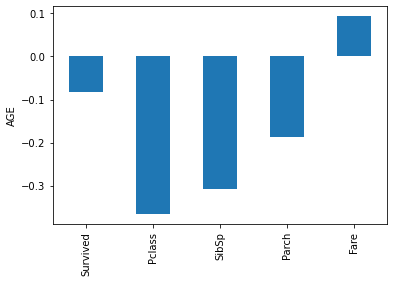

In [13]:
df.corr()['Age'].drop(['Age']).plot(kind='bar')
plt.ylabel("AGE")

SINCE AGE IS HAVING A GOOD CORRELATION WITH Pclass and SibSP WE WILL TRY IMPUTING AGE USING THESE 2 FEATURES

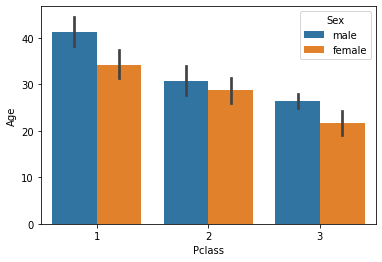

In [14]:
sns.barplot(x=df['Pclass'],y=df['Age'],hue=df['Sex'])
plt.show()

PEOPLE TRAVELLING IN CLASS 1 ARE OLDER AS COMPARED TO CLASS 2 AND SAME FOLLOWS FOR CLASS 2 AND CLASS 3 AS DEPICTED FROM THE PLOT WHICH SHOWS AGE OF A PERSON TRAVELLING HAVE A STRONG RELATION WITH THE CLASS THEY TRAVEL AND CAN BE USED TO IMPUTE NULLS OF AGE COLUMNS

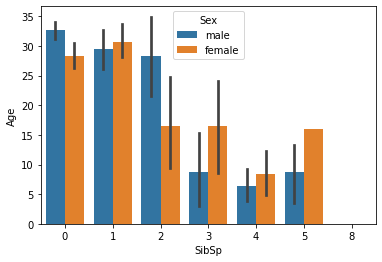

In [15]:
sns.barplot(x=df['SibSp'],y=df['Age'],hue=df['Sex'])
plt.show()

PEOPLE HAVING MORE SIBILING/SPOUSE LIKE 3,4,5 ARE FOUND YOUNGER THAN PEOPLE HAVING LESS SIBILINGS/SPOUSE ,WHICH SHOWS AGE IS ALSO RELATED TO SIBILING/SPOUSE COUNT AND CAN BE USED TO TREAT THE NULL VALUES

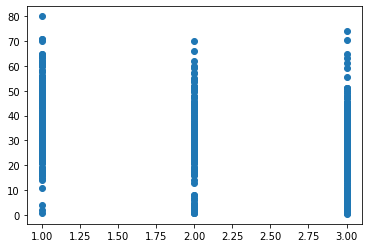

In [16]:
plt.scatter(x=df['Pclass'],y=df['Age'])
plt.show()

USING ITERATIVE IMPUTER  TO HANDLE THE NULLS IN AGE COLUMN

In [17]:
from sklearn.experimental import enable_iterative_imputer

In [18]:
from sklearn.impute import IterativeImputer

In [19]:
ii=IterativeImputer()

In [20]:
dt=pd.DataFrame(ii.fit_transform(df[['Age','Pclass']]))

In [21]:
dt

,0,1
0,22.00000,3.0
1,38.00000,1.0
2,26.00000,3.0
3,35.00000,1.0
4,35.00000,3.0
...,...,...
884,27.00000,2.0
885,19.00000,1.0
886,24.87099,3.0
887,26.00000,1.0


In [22]:
dt.isnull().sum()

0    0
1    0
dtype: int64

In [23]:
df['Age']=dt[0]

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         2
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
df['Age'].describe()

count    887.000000
mean      29.207808
std       13.143110
min        0.420000
25%       22.000000
50%       26.000000
75%       36.250000
max       80.000000
Name: Age, dtype: float64

OBSERVATION------
OUR AGE COLUMN STILL LOOKS A GOOD DISTRIBUTION SO WE WILL KEEP THIS SPREAD

SINCE ALL MAJOR NULLS HAVE BEEN REMOVED WE WILL DROP THE REAMAINING NULLS


In [27]:
df.dropna(inplace=True)

In [28]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
df.shape

(887, 8)

-----------LOSS AFTER REMOVING AND IMPUTINF THE NULLS-------------------------

In [30]:
(891-887)/891*100

0.44893378226711567

NEGLIBLY SMALL LOSS SO WE CAN PROCEED

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


PLOT TO GET THE IDEA OF DISTRIBUTION AND RELATIONSHIPS AMONG THE FEATURES

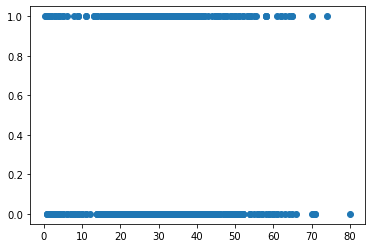

In [32]:
plt.scatter(x=df['Age'],y=df['Survived'])
plt.show()

*OBSERVING FROM THE SCATTERPLOT 
UPTIL 68 YEARS THERE ARE EQUAL CHANCES OF SURVIVG BUT AFTER IT  CHANCES OF SURVIVING DROPS SIGNIFIACNTLY 

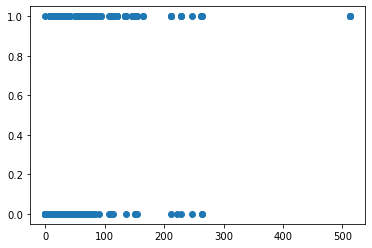

In [33]:
plt.scatter(x=df['Fare'],y=df['Survived'])
plt.show()

AS THE PRICE OF TICKET INCREASES WHICH MEANS PASSGENGER TRAVELS IN A HIGHER CLASS WE GOT A MORE CHANCE OF SURVING COMPARED TO OTHERS

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

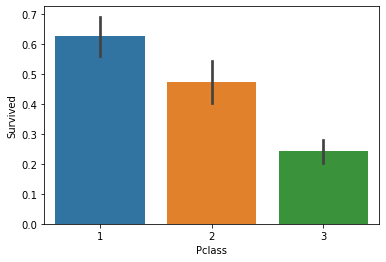

In [34]:
sns.barplot(x=df['Pclass'],y=df['Survived'])

THIS SHOWS THAT THERE SRE SIGNIFICANT AMOUNT OF CHANCES THAT AS THE CLASS IN WHICH PERSON TRAVEL GETS HIGH CHANCES OF HIM SURVIVING ALSO INCREASES

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

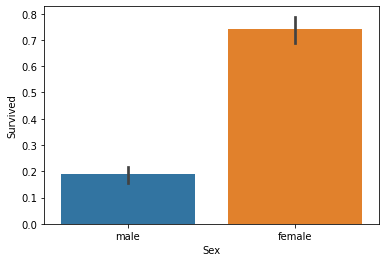

In [35]:
sns.barplot(x=df['Sex'],y=df['Survived'])

CHANCES OF SURVING OF A FEMALE PASSENGER IS MUCH MUCH HIGHER AS COMAPARED TO MALE PASSENGER

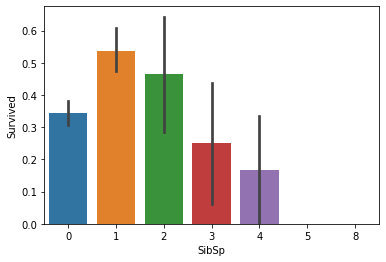

In [36]:
sns.barplot(x=df['SibSp'],y=df['Survived'])
plt.show()

WE CAN SEE THAT THERE IS A STEEP INCREASE IN SURVIVAL PROBABILITY OF A PASSENGER FROM 0 TO 1 SPOUSE THEN A GRADUAL DESCREASE AS NUMBER INCREASES FROM 2 TO 4

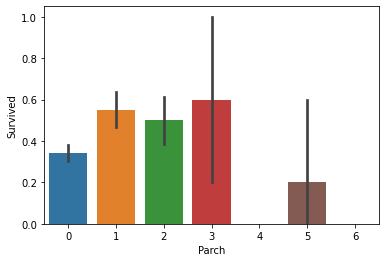

In [37]:
sns.barplot(x=df['Parch'],y=df['Survived'])
plt.show()

ALMOST EQUAL PROBABILITIES OF SURVIVING OF PASSENGER WITH PARENT AND CHILDREN WHEN COUNTS ARE 1,2 AND 3 BUT VERY LOW WHEN COUNT REACHES 5 OR WE CAN CONCLUDE CHANCES REDUCE AS NUMBER OF PARENT /CHILDREN INCREASES

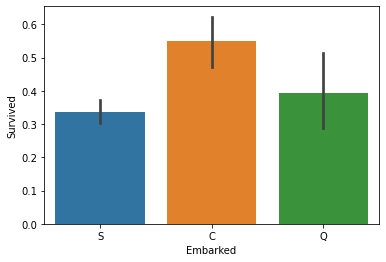

In [38]:
sns.barplot(x=df['Embarked'],y=df['Survived'])
plt.show()

THOUGH CHANCES OF EMBARKING FROM SOMEWHERE AND EXPECTING THE SURVIVAL WHEN THE SHIP SINKS MAKES NO SENSE PRACTICALLY BUT FROM THE PLOTS WE WILL CONSIDER THAT  PEOPLE EMBARKING FROM 'C' AND 'Q' HAVE MORE CHANCES OF SURVIVAL AS COMAPREED TO OTHERS

CHECKING FOR THE DISTRIBUTION IN FEATURES

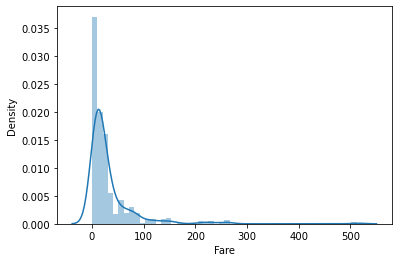

In [39]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(df['Fare'])
plt.show()

FARE HAVE SIGNIFICANT AMOUNT OF OUTLIERS BUT CAN BE SEENS AS NORMALLY DISTRIBUTED 

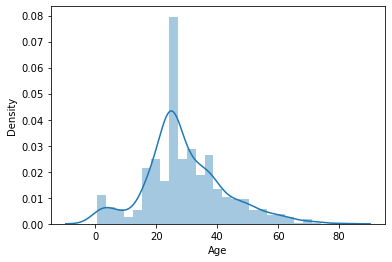

In [40]:
sns.distplot(df['Age'])
plt.show()

------------AGE IS-A LITTLE SKEWED TO THE RIGHT BUT CONTAINS LESS NUMBER OFOUTLIERS --------------------------------------------

------------CHECKING FOR THE OUTLIERS IN THE GRAPH USING BOXPLOT--------------------------

<AxesSubplot:ylabel='Fare'>

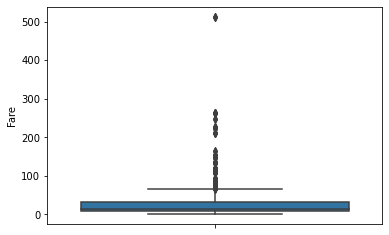

In [41]:
sns.boxplot(y=df['Fare'])

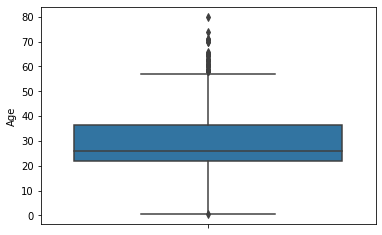

In [42]:
sns.boxplot(y=df['Age'])
plt.show()

-------------CHECKING FOR THE SKEWNESS----------------------------

In [43]:
df.skew().sort_values()


Pclass     -0.638455
Survived    0.485726
Age         0.527420
Parch       2.741198
SibSp       3.686760
Fare        4.796347
dtype: float64

SINCE WE ARE NOT CONSIDERING THE CATEGORICAL COLUMNS WE WILL ONLY CONSIDER THE SKEWNESS FOR FARE AND AGE 
@ AS WE CAN SEE FOR AGE ITS VERY LOW BUT HAVE TO MANAGED FOR FARE

-----------ENCODING THE CATEGORIAL COLUMNS FOR FURTHER ANALYSIS USING GET DUMMIES---------------------

In [44]:
fg=pd.get_dummies(df[['Sex','Embarked']])

In [45]:
df=pd.concat([df,fg],axis=1)

In [46]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [47]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


FOR HANDLING THE OUTLIERS WE WILL USE THE ZSCORE

In [48]:
from scipy.stats import zscore

In [49]:
z_score=np.abs(zscore(df))

In [50]:
dhh=df[(z_score<3).all(axis=1)]

In [51]:
dhh.shape

(746, 11)

=============CHECKING FOR THE LOSS IN THE DATASET============================


In [52]:
(887-746)/887*100

15.89627959413754

THERE IS SIGNIFICANT LOSS AND THAT IS TOO >10 % SO WE CANT AFFORD THIS LOSS SO WE WILL PROCEED WITHOUT TREATING THE OUTLIERS

CHECKING IF THERE IS AN IMBALANCE IN OUR TARGET 

In [53]:
df['Survived'].value_counts()

0    548
1    339
Name: Survived, dtype: int64

NO IMBALANCE AS OF NOW

HEATMAP OF CORRELATION

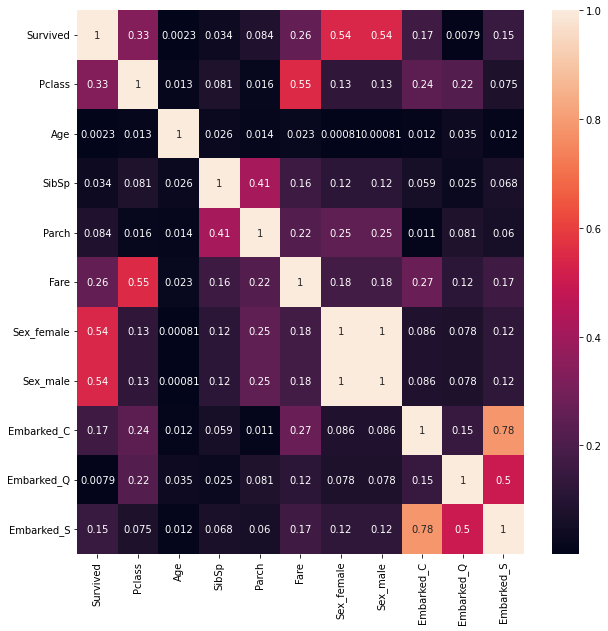

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':10})
plt.show()

NOT MUCH OF MULTI -COLLINEARITY CAN BE FOUND AS SEEN FROM THE HEATMAP  ----BUT WE WILL STILL CHECK IT USING VARIANCE INFLATION FACTOR

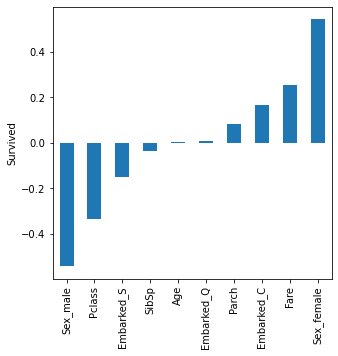

In [55]:
df.corr()['Survived'].drop(['Survived']).sort_values().plot(kind='bar',figsize=(5,5))
plt.ylabel('Survived')
plt.show()

OBSERVATION-------SINCE WE CAN SEE IN HEATMAP THERE ARE NO 2 FEATURES WHO ARE HAVING A CORRELATION GREATER THAN 80-90% SO THERE ARE LOW CHANCES OF MULTI COLLINIEARITY 


BUT WE WILL STILL CHECK FOR THE MULTI COLLINEARITY USING VARIANCE INFLATION FACTOR METHOD

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

TO REDUCE THE SKEWNESS AND STANDARDISNG THE DATA WE WILL USE POWER TRANSFORMER

In [57]:
from sklearn.preprocessing import PowerTransformer

In [58]:
pt=PowerTransformer(method='yeo-johnson',standardize=True)

In [59]:
x=df.drop(['Survived'],axis=1)

In [60]:
y=df['Survived']

In [61]:
x_scaled=pd.DataFrame(pt.fit_transform(x))

******CHECKING FOR SKEWNESS AFTER THE TRANSFORMATION**************

0   -0.445111
1    0.062806
2    0.802235
3    1.221964
4   -0.041334
5    0.621985
6   -0.621985
7    1.597482
8    2.965552
9   -1.015392
dtype: float64


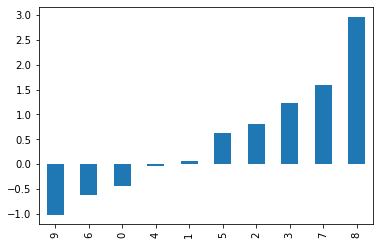

In [62]:
print(x_scaled.skew())
x_scaled.skew().sort_values().plot(kind='bar')
plt.show()

USING STANDARD SCALER 

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc=StandardScaler()

In [65]:
x_scale=pd.DataFrame(sc.fit_transform(x))

In [66]:
x_scale.skew().sort_values()

9   -1.015392
0   -0.638455
6   -0.621985
1    0.527420
5    0.621985
7    1.597482
3    2.741198
8    2.965552
2    3.686760
4    4.796347
dtype: float64

SINCE POWERTRANSFORMER DOES A BETTER JOB IN REDUCING THE SKEWNESS AND STANDARDISING THE DATA WE WILL CONTINUE WITH POWER TRANSFORMER

CHECKING FOR MULTI-COLLINEARITY ISSUE IF IT EXISTS------------

In [67]:
vif=pd.DataFrame()

In [74]:
vif['Features']=x.columns

In [75]:
vif['scores']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [76]:
vif[:5]

,Features,scores
0,Pclass,1.855681
1,Age,1.005284
2,SibSp,1.404933
3,Parch,1.416087
4,Fare,2.345397


SINCE NO SCORE IS GREATER THAN 5 OR EVEN CLOSER TO THAT WE CAN CONFIRM THAT THEIR IS NO ISSUE OF MULTI-COLLINEARITY EXISTING IN OUR DATASET

SPLITTING THE DATA IN TRAIN AND TEST

In [77]:
from sklearn.model_selection import train_test_split,cross_val_score

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [80]:
from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve

In [81]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=accuracy_score(y_train,lr_train_pred)
    lr_test_accuracy=accuracy_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}  --AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 50


TRAINING ACCURACY IS -78.7  --AND TESTING ACCURACY IS 78.65


AT RANDOM STATE-- 61


TRAINING ACCURACY IS -78.14  --AND TESTING ACCURACY IS 78.09


AT RANDOM STATE-- 98


TRAINING ACCURACY IS -78.14  --AND TESTING ACCURACY IS 78.09


AT RANDOM STATE-- 250


TRAINING ACCURACY IS -78.14  --AND TESTING ACCURACY IS 78.09


AT RANDOM STATE-- 299


TRAINING ACCURACY IS -78.14  --AND TESTING ACCURACY IS 78.09


AT RANDOM STATE-- 399


TRAINING ACCURACY IS -78.14  --AND TESTING ACCURACY IS 78.09


AT RANDOM STATE-- 448


TRAINING ACCURACY IS -78.7  --AND TESTING ACCURACY IS 78.65


AT RANDOM STATE-- 535


TRAINING ACCURACY IS -78.14  --AND TESTING ACCURACY IS 78.09


AT RANDOM STATE-- 624


TRAINING ACCURACY IS -78.14  --AND TESTING ACCURACY IS 78.09


AT RANDOM STATE-- 703


TRAINING ACCURACY IS -78.14  --AND TESTING ACCURACY IS 78.09


AT RANDOM STATE-- 710


TRAINING ACCURACY IS -78.14  --AND TESTING ACCURACY IS 78.09


AT RANDOM STATE-- 765


TRAINING ACCURACY IS -

SINCE AT RANDOM STATE 50 WE ARE GETTING LESS DIFFERENCES BETWEEN TRAIN AND TEST WE WILL MOVE WITH RANDOM STATE 50

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=50,test_size=0.20)

In [83]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_test_pred=lr.predict(x_test)
lr_train_pred=lr.predict(x_train)
lr_train_accuracy=accuracy_score(y_train,lr_train_pred)
lr_test_accuracy=accuracy_score(y_test,lr_test_pred)

In [84]:
print(f"\nACCURACY SCORE TRAINING FOR LOGISTIC REGRESSION  --{round(lr_train_accuracy*100,2)}")


ACCURACY SCORE TRAINING FOR LOGISTIC REGRESSION  --78.7


In [85]:
print(f"\nACCURACY SCORE TESTING FOR LOGISTIC REGRESSION  --{round(lr_test_accuracy*100,2)}")


ACCURACY SCORE TESTING FOR LOGISTIC REGRESSION  --78.65


In [86]:
for j in range(2,10):
    cross_val=cross_val_score(lr,x_scaled,y,cv=j).mean()
    print('\n\nAT CV =',j)
    print('\n\nCROSS VAL SCORE IS --',cross_val)
    print('\n\nACCURACY SCORE IS --',lr_test_accuracy)
    print('--------------------------------------------------------------------------------')
    



AT CV = 2


CROSS VAL SCORE IS -- 0.7508719215829825


ACCURACY SCORE IS -- 0.7865168539325843
--------------------------------------------------------------------------------


AT CV = 3


CROSS VAL SCORE IS -- 0.7700183234081539


ACCURACY SCORE IS -- 0.7865168539325843
--------------------------------------------------------------------------------


AT CV = 4


CROSS VAL SCORE IS -- 0.7734040601687661


ACCURACY SCORE IS -- 0.7865168539325843
--------------------------------------------------------------------------------


AT CV = 5


CROSS VAL SCORE IS -- 0.7756427347171968


ACCURACY SCORE IS -- 0.7865168539325843
--------------------------------------------------------------------------------


AT CV = 6


CROSS VAL SCORE IS -- 0.7745372923944354


ACCURACY SCORE IS -- 0.7865168539325843
--------------------------------------------------------------------------------


AT CV = 7


CROSS VAL SCORE IS -- 0.771126823432785


ACCURACY SCORE IS -- 0.7865168539325843
--------------

AT CV=5 WE ARE GETTING LESS DIFFERNCE BETWEEN OUR SCORES BETWEEN CROSS VAL SCORE AND ACCURACY SCORE OUR MODEL IT IMPLIES THAT OUR MODEL IS NOT OVERFITTING AND SCORES ARE REASONABLE

In [87]:

print(f"\nCROSS VAL SCORE---{round(cross_val_score(lr,x_scaled,y,cv=5).mean()*100,2)}")



CROSS VAL SCORE---77.56


------CLASSIFICATION  MATRIX AND CONFUSION MATRIX FOR LOGISTIC REGRESSION-------------------------

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(f"CLASSIFICATION REPORT FOR LOGISTIC REGRESSION ---\n\n\n {(classification_report(y_test,lr_test_pred))}")

CLASSIFICATION REPORT FOR LOGISTIC REGRESSION ---


               precision    recall  f1-score   support

           0       0.79      0.86      0.82       102
           1       0.79      0.68      0.73        76

    accuracy                           0.79       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.79      0.79      0.78       178



In [90]:
print(f"CONFUSION MATRIX FOR LOGISTIC REGRESSION ---\n\n\n {(confusion_matrix(y_test,lr_test_pred))}")

CONFUSION MATRIX FOR LOGISTIC REGRESSION ---


 [[88 14]
 [24 52]]


In [91]:
print(f"\nACCURACY SCORE TESTIING FOR LOGISTIC REGRESSION  at random state 50 --{round(lr_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE AT CV=5---{round(cross_val_score(lr,x_scaled,y,cv=5).mean()*100,2)}")
print(f"\nACCURACY SCORE TRAINING FOR LOGISTIC REGRESSION  --{round(lr_train_accuracy*100,2)}")



ACCURACY SCORE TESTIING FOR LOGISTIC REGRESSION  at random state 50 --78.65

CROSS VAL SCORE AT CV=5---77.56

ACCURACY SCORE TRAINING FOR LOGISTIC REGRESSION  --78.7


MODEL 2)-----DECISON TREE--------------------------------
-------------------------------------------------------------------------


In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dt=DecisionTreeClassifier()

In [94]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
dt_train_pred=dt.predict(x_train)

In [96]:
dt_test_pred=dt.predict(x_test)
dt_train_pred=dt.predict(x_train)

In [97]:
dt_train_accuracy=accuracy_score(y_train,dt_train_pred)
dt_test_accuracy=accuracy_score(y_test,dt_test_pred)

In [98]:
print(f"\nACCURACY SCORE (TRAINING) FOR DECISION TREE CLASSIFIER AT RANDOM STATE 50 --{round(dt_train_accuracy*100,2)}")


ACCURACY SCORE (TRAINING) FOR DECISION TREE CLASSIFIER AT RANDOM STATE 50 --99.01


In [99]:
print(f"\nACCURACY SCORE(TESTING) FOR DECISION TREE CLASSIFIER AT RANDOM STATE 50 --{round(dt_test_accuracy*100,2)}")


ACCURACY SCORE(TESTING) FOR DECISION TREE CLASSIFIER AT RANDOM STATE 50 --74.72


In [100]:
for j in range(2,10):
    cross_val=cross_val_score(dt,x_scaled,y,cv=j).mean()
    print('\n\nAT CV =',j)
    print('\n\nCROSS VAL SCORE IS --',cross_val)
    print('\n\nACCURACY SCORE IS --',dt_test_accuracy)
    print('--------------------------------------------------------------------------------')
    



AT CV = 2


CROSS VAL SCORE IS -- 0.7328259410652187


ACCURACY SCORE IS -- 0.7471910112359551
--------------------------------------------------------------------------------


AT CV = 3


CROSS VAL SCORE IS -- 0.7553595968850205


ACCURACY SCORE IS -- 0.7471910112359551
--------------------------------------------------------------------------------


AT CV = 4


CROSS VAL SCORE IS -- 0.7689199380375851


ACCURACY SCORE IS -- 0.7471910112359551
--------------------------------------------------------------------------------


AT CV = 5


CROSS VAL SCORE IS -- 0.7531771726020441


ACCURACY SCORE IS -- 0.7471910112359551
--------------------------------------------------------------------------------


AT CV = 6


CROSS VAL SCORE IS -- 0.7576530612244898


ACCURACY SCORE IS -- 0.7471910112359551
--------------------------------------------------------------------------------


AT CV = 7


CROSS VAL SCORE IS -- 0.7576731479993571


ACCURACY SCORE IS -- 0.7471910112359551
-------------

In [101]:
print(f"\nCROSS VAL SCORE FOR DECISION TREE CLASSIFIER AT CV=5---{round(cross_val_score(dt,x_scaled,y,cv=5).mean()*100,2)}")


CROSS VAL SCORE FOR DECISION TREE CLASSIFIER AT CV=5---74.75


SINCE THERE IS NELGLIGIBLY SMALL DIFFERENCE BETWEEN CROSS VAL SCORE AND ACCURACY_SCORE MODEL IS NOT OVER OR UNDERFITTING 

HYPER TUNING THE PARAMETERS FOR CHECKING IF WE CAN INCREASE THE ACCURACY AND MAKE IT A BETTER MODEL

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
params={"max_depth":np.arange(25,30),
       "min_samples_leaf":np.arange(5,9),
       "min_samples_split":np.arange(3,5),
       "criterion":['gini','entropy']}

In [104]:
gs=GridSearchCV(dt,param_grid=params)

In [105]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([25, 26, 27, 28, 29]),
                         'min_samples_leaf': array([5, 6, 7, 8]),
                         'min_samples_split': array([3, 4])})

In [106]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 6,
 'min_samples_split': 3}

In [107]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=27,min_samples_leaf=6,min_samples_split=3)

In [108]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=27, min_samples_leaf=6, min_samples_split=3)

In [109]:
dt_test_pred=dt.predict(x_test)

In [110]:
dt_test_accuracy=accuracy_score(y_test,dt_test_pred)

In [111]:
print(f"\nACCURACY SCORE FOR DECISION TREE CLASSIFIER AT RANDOM STATE 50 --{round(dt_test_accuracy*100,2)}")


ACCURACY SCORE FOR DECISION TREE CLASSIFIER AT RANDOM STATE 50 --74.72


In [112]:
print(f"\nCROSS VAL SCORE FOR DECISION TREE CLASSIFIER AT CV=5---{round(cross_val_score(dt,x_scaled,y,cv=5).mean()*100,2)}")


CROSS VAL SCORE FOR DECISION TREE CLASSIFIER AT CV=5---80.28


In [113]:
params={"max_depth":np.arange(30,40),
       "min_samples_leaf":np.arange(4,6),
       "min_samples_split":np.arange(2,5),
       "criterion":['gini','entropy']}

In [114]:
dt=DecisionTreeClassifier()

In [115]:
gs=GridSearchCV(dt,param_grid=params)

In [116]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]),
                         'min_samples_leaf': array([4, 5]),
                         'min_samples_split': array([2, 3, 4])})

In [117]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [118]:
dt=gs.best_estimator_

In [119]:
dt_test_accuracy=accuracy_score(y_test,dt_test_pred)


In [120]:
print(f"\nACCURACY SCORE FOR DECISION TREE CLASSIFIER AT RANDOM STATE 50 --{round(dt_test_accuracy*100,2)}")


ACCURACY SCORE FOR DECISION TREE CLASSIFIER AT RANDOM STATE 50 --74.72


In [121]:
print(f"\nCROSS VAL SCORE FOR DECISION TREE CLASSIFIER AT CV=5---{round(cross_val_score(dt,x_scaled,y,cv=5).mean()*100,2)}")


CROSS VAL SCORE FOR DECISION TREE CLASSIFIER AT CV=5---79.38


In [122]:
params={"max_depth":np.arange(18,22),
       "min_samples_leaf":np.arange(4,6),
       "min_samples_split":np.arange(2,5),
       "criterion":['gini','entropy']}

In [123]:
gs=GridSearchCV(dt,param_grid=params)

In [124]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=30,
                                              min_samples_leaf=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([18, 19, 20, 21]),
                         'min_samples_leaf': array([4, 5]),
                         'min_samples_split': array([2, 3, 4])})

In [125]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [126]:
dt=gs.best_estimator_

In [127]:
dt_test_pred=dt.predict(x_test)

In [128]:
dt_test_accuracy=accuracy_score(y_test,dt_test_pred)

In [129]:
print(f"\nACCURACY SCORE FOR DECISION TREE CLASSIFIER AT RANDOM STATE 50 --{round(dt_test_accuracy*100,2)}")


ACCURACY SCORE FOR DECISION TREE CLASSIFIER AT RANDOM STATE 50 --76.97


In [130]:
print(f"\nCROSS VAL SCORE FOR DECISION TREE CLASSIFIER AT CV=5---{round(cross_val_score(dt,x_scaled,y,cv=5).mean()*100,2)}")


CROSS VAL SCORE FOR DECISION TREE CLASSIFIER AT CV=5---78.93


*******************finalising these parameters as values are closee betweeen cross val and accuracy score********************

CLASSIFICATION REPORT FOR DECISION TREE CLASSIFIER MODEL

In [131]:
print(f"CLASSIFICATION REPORT FOR DECISION TREE CLASSIFIER ---\n\n\n {(classification_report(y_test,dt_test_pred))}")

CLASSIFICATION REPORT FOR DECISION TREE CLASSIFIER ---


               precision    recall  f1-score   support

           0       0.76      0.88      0.81       102
           1       0.80      0.62      0.70        76

    accuracy                           0.77       178
   macro avg       0.78      0.75      0.76       178
weighted avg       0.77      0.77      0.76       178



------------------------CONFUSION MATRIX FOR DECISION TREE MODEL------------------

In [132]:
print(f"CONFUSION MATRIX FOR LOGISTIC REGRESSION ---\n\n\n {(confusion_matrix(y_test,dt_test_pred))}")

CONFUSION MATRIX FOR LOGISTIC REGRESSION ---


 [[90 12]
 [29 47]]


In [133]:
print(f"\nACCURACY SCORE at random state 50 --{round(dt_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE AT CV=5---{round(cross_val_score(dt,x_scaled,y,cv=5).mean()*100,2)}")



ACCURACY SCORE at random state 50 --76.97

CROSS VAL SCORE AT CV=5---78.92


MODEL 3)------RANDOM FOREST CLASSIFIER
------------------------

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rfc=RandomForestClassifier()

In [136]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [137]:
rfc_train_pred=rfc.predict(x_train)

In [138]:
rfc_test_pred=rfc.predict(x_test)

In [139]:
rfc_test_accuracy=accuracy_score(y_test,rfc_test_pred)

In [140]:
rfc_train_accuracy=accuracy_score(y_train,rfc_train_pred)

In [141]:
print(f"\nACCURACY SCORE (TRAINING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --{round(rfc_train_accuracy*100,2)}")


ACCURACY SCORE (TRAINING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --99.01


In [142]:
print(f"\nACCURACY SCORE (TESTING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --{round(rfc_test_accuracy*100,2)}")


ACCURACY SCORE (TESTING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --79.21


**************CROSS VAL SCORES AT DIFFERENT CV's*********************

In [143]:
print(f"\nCROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=5---{round(cross_val_score(rfc,x_scaled,y,cv=5).mean()*100,2)}")


CROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=5---80.28


******************HYPER PARAMETER TUNING***************

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
parma={"n_estimators":np.arange(50,60),
      "criterion":["gini", "entropy", "log_loss"],
       "min_samples_split":np.arange(2,5),
       "oob_score":[True,False],
       }

In [146]:
rgsc=GridSearchCV(rfc,param_grid=parma)

In [147]:
rgsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'oob_score': [True, False]})

In [148]:
rgsc.best_params_

{'criterion': 'entropy',
 'min_samples_split': 4,
 'n_estimators': 51,
 'oob_score': False}

In [149]:
rfc=RandomForestClassifier(criterion='gini',n_estimators=54,min_samples_split=4,oob_score=False)

In [150]:
rfc.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=4, n_estimators=54)

In [151]:
rfc_test_pred=rfc.predict(x_test)
rfc_train_pred=rfc.predict(x_train)
rfc_test_accuracy=accuracy_score(y_test,rfc_test_pred)
rfc_train_accuracy=accuracy_score(y_train,rfc_train_pred)


In [152]:
print(f"\nACCURACY SCORE (TRAINING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --{round(rfc_train_accuracy*100,2)}")


ACCURACY SCORE (TRAINING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --95.2


In [153]:
print(f"\nACCURACY SCORE (TESTING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --{round(rfc_test_accuracy*100,2)}")


ACCURACY SCORE (TESTING) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --79.21


In [154]:
print(f"\nCROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=5---{round(cross_val_score(rfc,x_scaled,y,cv=5).mean()*100,2)}")


CROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=5---80.51


In [155]:
parma={"n_estimators":np.arange(60,70),
      "criterion":["gini", "entropy", "log_loss"],
       "min_samples_split":np.arange(4,8),
       "oob_score":[True,False],
       }

In [156]:
rfc=RandomForestClassifier()

In [157]:
rgv=GridSearchCV(rfc,param_grid=parma)

In [158]:
rgv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': array([4, 5, 6, 7]),
                         'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69]),
                         'oob_score': [True, False]})

In [159]:
rgv.best_params_

{'criterion': 'log_loss',
 'min_samples_split': 7,
 'n_estimators': 63,
 'oob_score': False}

In [160]:
rfc=RandomForestClassifier(criterion='entropy',min_samples_split=7,n_estimators=65,oob_score=True)

In [161]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=7,
                       n_estimators=65, oob_score=True)

In [162]:
rfc_train_pred=rfc.predict(x_train)

In [163]:
rfc_test_pred=rfc.predict(x_test)

In [164]:
rfc_accuracy_score=accuracy_score(y_test,rfc_test_pred)

In [165]:
rfc_train_accuracy=accuracy_score(y_train,rfc_train_pred)

In [166]:
print(f"\nACCURACY SCORE (Training) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --{round(rfc_train_accuracy*100,2)}")


ACCURACY SCORE (Training) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --92.95


In [167]:
print(f"\nACCURACY SCORE(Testing) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --{round(rfc_accuracy_score*100,2)}")


ACCURACY SCORE(Testing) FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --79.21


In [168]:
print(f"\nCROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=5---{round(cross_val_score(rfc,x_scaled,y,cv=5).mean()*100,2)}")


CROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=5---81.52


SINCE CLOSE ACCURACIES WERE GIVEN BETWEEN CROSS VAL SCORES  AND ACCURACY SCOREE IN PARAMETER :
criterion='entropy',min_samples_split=7,n_estimators=65,oob_score=True
we will move with these parameters


    

In [169]:
rfc=RandomForestClassifier(criterion='entropy',min_samples_split=7,n_estimators=65,oob_score=True)
rfc.fit(x_train,y_train)
rfc_train_pred=rfc.predict(x_train)
rfc_test_pred=rfc.predict(x_test)
rfc_test_accuracy=accuracy_score(y_test,rfc_test_pred)
rfc_train_accuracy=accuracy_score(y_train,rfc_train_pred)


In [170]:
print(f"\nACCURACY SCORE TRAINIG FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --{round(rfc_train_accuracy*100,2)}")


ACCURACY SCORE TRAINIG FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --92.81


In [171]:
print(f"\nACCURACY SCORE TESTIONG FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --{round(rfc_test_accuracy*100,2)}")


ACCURACY SCORE TESTIONG FOR RANDOM FOREST CLASSIFIER  AT RANDOM STATE 50 --77.53


In [172]:
print(f"\nCROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=5---{round(cross_val_score(rfc,x_scaled,y,cv=5).mean()*100,2)}")


CROSS VAL SCORE FOR RANDOM FOREST CLASSIFIER AT CV=5---81.29


CONFUSION MATRIX AND CLASSIFICATION REPORTS FOR OUR RFC MODEL

In [173]:
print(f"CLASSIFICATION REPORT FOR RANDOM FOREST CLASSIFIER ---\n\n\n {(classification_report(y_test,rfc_test_pred))}")

CLASSIFICATION REPORT FOR RANDOM FOREST CLASSIFIER ---


               precision    recall  f1-score   support

           0       0.77      0.87      0.82       102
           1       0.79      0.64      0.71        76

    accuracy                           0.78       178
   macro avg       0.78      0.76      0.76       178
weighted avg       0.78      0.78      0.77       178



In [174]:
print(f"CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER ---\n\n\n {(confusion_matrix(y_test,rfc_test_pred))}")

CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER ---


 [[89 13]
 [27 49]]


MODEL 4)-BAGGING CLASSIFIER
---------------------------------------------------------


In [175]:
from sklearn.ensemble import BaggingClassifier

In [176]:
bc=BaggingClassifier()

In [177]:
bc.fit(x_train,y_train)

BaggingClassifier()

In [178]:
bc_train_pred=bc.predict(x_train)

In [179]:
bc_test_pred=bc.predict(x_test)

In [180]:
bc_train_accuracy=accuracy_score(y_train,bc_train_pred)

In [181]:
bc_test_accuracy=accuracy_score(y_test,bc_test_pred)

In [182]:
print(f"\nACCURACY SCORE TRAINING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --{round(bc_train_accuracy*100,2)}")


ACCURACY SCORE TRAINING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --97.6


In [183]:
print(f"\nACCURACY SCORE TESTING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --{round(bc_test_accuracy*100,2)}")


ACCURACY SCORE TESTING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --76.97


In [184]:
for j in range(2,10):
    cross_val=cross_val_score(bc,x_scaled,y,cv=j).mean()
    print('\n\nAT CV =',j)
    print('\n\nCROSS VAL SCORE IS --',cross_val)
    print('\n\nACCURACY SCORE IS --',bc_test_accuracy)
    print('--------------------------------------------------------------------------------')
    



AT CV = 2


CROSS VAL SCORE IS -- 0.775661948630346


ACCURACY SCORE IS -- 0.7696629213483146
--------------------------------------------------------------------------------


AT CV = 3


CROSS VAL SCORE IS -- 0.7677813406626965


ACCURACY SCORE IS -- 0.7696629213483146
--------------------------------------------------------------------------------


AT CV = 4


CROSS VAL SCORE IS -- 0.8061279605397252


ACCURACY SCORE IS -- 0.7696629213483146
--------------------------------------------------------------------------------


AT CV = 5


CROSS VAL SCORE IS -- 0.8095410398019425


ACCURACY SCORE IS -- 0.7696629213483146
--------------------------------------------------------------------------------


AT CV = 6


CROSS VAL SCORE IS -- 0.7858445179873751


ACCURACY SCORE IS -- 0.7696629213483146
--------------------------------------------------------------------------------


AT CV = 7


CROSS VAL SCORE IS -- 0.7801881907618691


ACCURACY SCORE IS -- 0.7696629213483146
--------------

In [185]:
print(f"\nCROSS VAL SCORE FOR BAGGING CLASSIFIER AT CV=5---{round(cross_val_score(bc,x_scaled,y,cv=5).mean()*100,2)}")


CROSS VAL SCORE FOR BAGGING CLASSIFIER AT CV=5---78.81


*****HYPER PARAMETER TUNING ****************

In [186]:
par={"n_estimators":np.arange(50,60),
    "oob_score":[True,False],
    "random_state":[200,220,275,300,375,350,325],
    }

In [187]:
bcgs=GridSearchCV(bc,param_grid=par)

In [188]:
bcgs.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'oob_score': [True, False],
                         'random_state': [200, 220, 275, 300, 375, 350, 325]})

In [189]:
bcgs.best_params_

{'n_estimators': 57, 'oob_score': True, 'random_state': 325}

In [190]:
bc=BaggingClassifier(base_estimator=dt,n_estimators=57,oob_score=True,random_state=325)

In [191]:
bc.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=18,
                                                        min_samples_leaf=5,
                                                        min_samples_split=3),
                  n_estimators=57, oob_score=True, random_state=325)

In [192]:
bc_train_pred=bc.predict(x_train)
bc_test_pred=bc.predict(x_test)
bc_train_accuracy=accuracy_score(y_train,bc_train_pred)
bc_test_accuracy=accuracy_score(y_test,bc_test_pred)

In [193]:
print(f"\nACCURACY SCORE TRAINING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --{round(bc_train_accuracy*100,2)}")


ACCURACY SCORE TRAINING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --89.28


In [194]:
print(f"\nACCURACY SCORE TESTING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --{round(bc_test_accuracy*100,2)}")


ACCURACY SCORE TESTING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --78.65


In [195]:
print(f"\nCROSS VAL SCORE FOR BAGGING CLASSIFIER AT CV=5---{round(cross_val_score(bc,x_scaled,y,cv=5).mean()*100,2)}")


CROSS VAL SCORE FOR BAGGING CLASSIFIER AT CV=5---81.4


******AGAIN TUNING THE PARAMETERS****************

In [196]:
bc=BaggingClassifier()

In [197]:
pa={"bootstrap":[True,False],
   "oob_score":[True,False],
   "n_estimators":[60,70,72,80],
    "random_state":[234,456,350]
   }

In [198]:
bcgs=GridSearchCV(bc,param_grid=pa)

In [199]:
bcgs.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [60, 70, 72, 80],
                         'oob_score': [True, False],
                         'random_state': [234, 456, 350]})

In [200]:
bcgs.best_params_

{'bootstrap': True, 'n_estimators': 80, 'oob_score': True, 'random_state': 350}

In [201]:
bc=BaggingClassifier(bootstrap=True,n_estimators=80,oob_score=True,random_state=350)

In [202]:
bc.fit(x_train,y_train)

BaggingClassifier(n_estimators=80, oob_score=True, random_state=350)

In [203]:
bc_train_pred=bc.predict(x_train)
bc_test_pred=bc.predict(x_test)
bc_train_accuracy=accuracy_score(y_train,bc_train_pred)
bc_test_accuracy=accuracy_score(y_test,bc_test_pred)

In [204]:
print(f"\nACCURACY SCORE TRAINING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --{round(bc_train_accuracy*100,2)}")


ACCURACY SCORE TRAINING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --99.01


In [205]:
print(f"\nACCURACY SCORE TESTING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --{round(bc_test_accuracy*100,2)}")


ACCURACY SCORE TESTING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --76.97


In [206]:
print(f"\nCROSS VAL SCORE FOR BAGGING CLASSIFIER AT CV=5---{round(cross_val_score(bc,x_scaled,y,cv=5).mean()*100,2)}")


CROSS VAL SCORE FOR BAGGING CLASSIFIER AT CV=5---79.94


SINCE THE ACCURACY SCORE CROSS VAL SCORE WERE QUIET IN CASE OF PARAMETTERS:
base_estimator=dt,n_estimators=57,oob_score=True,random_state=325
SO WE WILL CONTINUE WITH THESE PARAMETRES AS OUR BASE PARAMETERS

    
    

In [207]:
bc=BaggingClassifier(base_estimator=dt,n_estimators=57,oob_score=True,random_state=325)

In [208]:
bc.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=18,
                                                        min_samples_leaf=5,
                                                        min_samples_split=3),
                  n_estimators=57, oob_score=True, random_state=325)

In [209]:
bc_train_pred=bc.predict(x_train)
bc_test_pred=bc.predict(x_test)
bc_train_accuracy=accuracy_score(y_train,bc_train_pred)
bc_test_accuracy=accuracy_score(y_test,bc_test_pred)

In [210]:
print(f"\nACCURACY SCORE TRAINING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --{round(bc_train_accuracy*100,2)}")
print(f"\nACCURACY SCORE TESTING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --{round(bc_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE FOR BAGGING CLASSIFIER AT CV=5---{round(cross_val_score(bc,x_scaled,y,cv=5).mean()*100,2)}")


ACCURACY SCORE TRAINING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --89.28

ACCURACY SCORE TESTING FOR BAGGING CLASSIFIER  AT RANDOM STATE 50 --78.65

CROSS VAL SCORE FOR BAGGING CLASSIFIER AT CV=5---81.4


In [211]:
print(f"CLASSIFICATION REPORT FOR BAGGINGG CLASSIFIER ---\n\n\n {(classification_report(y_test,bc_test_pred))}")

CLASSIFICATION REPORT FOR BAGGINGG CLASSIFIER ---


               precision    recall  f1-score   support

           0       0.77      0.89      0.83       102
           1       0.82      0.64      0.72        76

    accuracy                           0.79       178
   macro avg       0.79      0.77      0.77       178
weighted avg       0.79      0.79      0.78       178



In [212]:
print(f"CONFUSION MATRIX FOR BAGGING CLASSIFIER ---\n\n\n {(confusion_matrix(y_test,bc_test_pred))}")

CONFUSION MATRIX FOR BAGGING CLASSIFIER ---


 [[91 11]
 [27 49]]


MODEL 5)----KNN 
----------------------

In [213]:
from sklearn.neighbors import KNeighborsClassifier

In [214]:
knn=KNeighborsClassifier()

In [215]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [216]:
knn_train_pred=knn.predict(x_train)
knn_test_pred=knn.predict(x_test)
knn_train_accuracy=accuracy_score(y_train,knn_train_pred)
knn_test_accuracy=accuracy_score(y_test,knn_test_pred)

In [217]:
print(f"\nACCURACY SCORE TRAINING FOR KNN   AT RANDOM STATE 50 --{round(knn_train_accuracy*100,2)}")


ACCURACY SCORE TRAINING FOR KNN   AT RANDOM STATE 50 --85.33


In [218]:
print(f"\nACCURACY SCORE TESTING FOR KNN  AT RANDOM STATE 50 --{round(knn_test_accuracy*100,2)}")


ACCURACY SCORE TESTING FOR KNN  AT RANDOM STATE 50 --75.84


In [219]:
print(f"\nCROSS VAL SCORE FOR KNN AT CV=5---{round(cross_val_score(knn,x_scaled,y,cv=5).mean()*100,2)}")


CROSS VAL SCORE FOR KNN AT CV=5---78.13


----------------HYPER PARAMETER TUNING------------------------------------------

In [220]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [221]:
knn=KNeighborsClassifier()

In [222]:
pop={"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':np.arange(3,6),
    'leaf_size':[25,28,30,32,35,38]}

In [223]:
kgsc=GridSearchCV(knn,param_grid=pop)

In [224]:
kgsc.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 28, 30, 32, 35, 38],
                         'n_neighbors': array([3, 4, 5])})

In [225]:
kgsc.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 5}

In [226]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=42,n_neighbors=5)

In [227]:
knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=42)

In [228]:
knn_train_pred=knn.predict(x_train)
knn_test_pred=knn.predict(x_test)
knn_train_accuracy=accuracy_score(y_train,knn_train_pred)
knn_test_accuracy=accuracy_score(y_test,knn_test_pred)

In [229]:
print(f"\nACCURACY SCORE TRAINING FOR KNN   AT RANDOM STATE 50 --{round(knn_train_accuracy*100,2)}")
print(f"\nACCURACY SCORE TESTING FOR KNN  AT RANDOM STATE 50 --{round(knn_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE FOR KNN AT CV=5---{round(cross_val_score(knn,x_scaled,y,cv=5).mean()*100,2)}")


ACCURACY SCORE TRAINING FOR KNN   AT RANDOM STATE 50 --85.33

ACCURACY SCORE TESTING FOR KNN  AT RANDOM STATE 50 --75.84

CROSS VAL SCORE FOR KNN AT CV=5---78.13


-------------TUNING ONCE AGAIN-----------------------

In [230]:
knn=KNeighborsClassifier()

In [231]:
pars={"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':np.arange(2,5),
    'leaf_size':[25,28,30,32,35,38,40,45,50,36,38]}

In [232]:
kgsc=GridSearchCV(knn,param_grid=pars)

In [233]:
kgsc.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 28, 30, 32, 35, 38, 40, 45, 50, 36,
                                       38],
                         'n_neighbors': array([2, 3, 4])})

In [234]:
kgsc.best_params_

{'algorithm': 'auto', 'leaf_size': 38, 'n_neighbors': 3}

In [235]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=38,n_neighbors=3)

In [236]:
knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=38, n_neighbors=3)

In [237]:
knn_train_pred=knn.predict(x_train)
knn_test_pred=knn.predict(x_test)
knn_train_accuracy=accuracy_score(y_train,knn_train_pred)
knn_test_accuracy=accuracy_score(y_test,knn_test_pred)

In [238]:
print(f"\nACCURACY SCORE TRAINING FOR KNN   AT RANDOM STATE 50 --{round(knn_train_accuracy*100,2)}")
print(f"\nACCURACY SCORE TESTING FOR KNN  AT RANDOM STATE 50 --{round(knn_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE FOR KNN AT CV=5---{round(cross_val_score(knn,x_scaled,y,cv=5).mean()*100,2)}")


ACCURACY SCORE TRAINING FOR KNN   AT RANDOM STATE 50 --87.02

ACCURACY SCORE TESTING FOR KNN  AT RANDOM STATE 50 --75.84

CROSS VAL SCORE FOR KNN AT CV=5---79.82


SINCE THERE IS A MINUTE DIIFERENCE BETWEEN THE SCORES WE GETTING WE CAN CHOOSE ANY HYPER TUNED PARAMETERS AND WE WILL GO WITH THE LAST TUNED PARAMETERS

In [239]:
print(f"CLASSIFICATION REPORT FOR KNN CLASSIFIER---\n\n\n {(classification_report(y_test,knn_test_pred))}")

CLASSIFICATION REPORT FOR KNN CLASSIFIER---


               precision    recall  f1-score   support

           0       0.76      0.85      0.80       102
           1       0.76      0.63      0.69        76

    accuracy                           0.76       178
   macro avg       0.76      0.74      0.75       178
weighted avg       0.76      0.76      0.75       178



In [240]:
print(f"CONFUSION MATRIX FOR BAGGING CLASSIFIER ---\n\n\n {(confusion_matrix(y_test,knn_test_pred))}")

CONFUSION MATRIX FOR BAGGING CLASSIFIER ---


 [[87 15]
 [28 48]]


MODEL 6)-----SVC-----------
-----------------------

In [241]:
from sklearn.svm import SVC

In [242]:
svc=SVC()

In [243]:
svc.fit(x_train,y_train)

SVC()

In [244]:
svc_train_pred=svc.predict(x_train)
svc_test_pred=svc.predict(x_test)
svc_train_accuracy=accuracy_score(y_train,svc_train_pred)
svc_test_accuracy=accuracy_score(y_test,svc_test_pred)

In [245]:
print(f"\nACCURACY SCORE TRAINING FOR SVM   AT RANDOM STATE 50 --{round(svc_train_accuracy*100,2)}")
print(f"\nACCURACY SCORE TESTING FOR SVM AT RANDOM STATE 50 --{round(svc_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE FOR SVM AT CV=5---{round(cross_val_score(svc,x_scaled,y,cv=5).mean()*100,2)}")


ACCURACY SCORE TRAINING FOR SVM   AT RANDOM STATE 50 --82.23

ACCURACY SCORE TESTING FOR SVM AT RANDOM STATE 50 --79.21

CROSS VAL SCORE FOR SVM AT CV=5---79.71


In [246]:
print(f"CLASSIFICATION REPORT FOR SVC CLASSIFIER---\n\n\n {(classification_report(y_test,svc_test_pred))}")

CLASSIFICATION REPORT FOR SVC CLASSIFIER---


               precision    recall  f1-score   support

           0       0.75      0.96      0.84       102
           1       0.91      0.57      0.70        76

    accuracy                           0.79       178
   macro avg       0.83      0.76      0.77       178
weighted avg       0.82      0.79      0.78       178



In [247]:
print(f"CONFUSION MATRIX FOR SVC CLASSIFIER ---\n\n\n {(confusion_matrix(y_test,svc_test_pred))}")

CONFUSION MATRIX FOR SVC CLASSIFIER ---


 [[98  4]
 [33 43]]


MODEL 7) ADABOOST CLASSIFIER-
----------------------

In [248]:
from sklearn.ensemble import AdaBoostClassifier

In [249]:
adc=AdaBoostClassifier()

In [250]:
adc.fit(x_train,y_train)

AdaBoostClassifier()

In [251]:
adc_train_pred=adc.predict(x_train)
adc_test_pred=adc.predict(x_test)
adc_train_accuracy=accuracy_score(y_train,adc_train_pred)
adc_test_accuracy=accuracy_score(y_test,adc_test_pred)

In [252]:
print(f"\nACCURACY SCORE TRAINING FOR ADC   AT RANDOM STATE 50 --{round(adc_train_accuracy*100,2)}")
print(f"\nACCURACY SCORE TESTING FOR ADC AT RANDOM STATE 50 --{round(adc_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE FOR ADC AT CV=5---{round(cross_val_score(adc,x_scaled,y,cv=5).mean()*100,2)}")


ACCURACY SCORE TRAINING FOR ADC   AT RANDOM STATE 50 --81.52

ACCURACY SCORE TESTING FOR ADC AT RANDOM STATE 50 --78.09

CROSS VAL SCORE FOR ADC AT CV=5---78.02


------HYPER PARAMETER TUNING-----------------

In [253]:
adc.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [254]:
param={"algorithm":['SAMME', 'SAMME.R'],
      'n_estimators':np.arange(60,70),
      'random_state':[121,234,345,389,567]}


In [255]:
adgs=GridSearchCV(adc,param_grid=param)


In [256]:
adgs.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69]),
                         'random_state': [121, 234, 345, 389, 567]})

In [257]:
adgs.best_params_

{'algorithm': 'SAMME', 'n_estimators': 60, 'random_state': 121}

In [258]:
adc=AdaBoostClassifier(algorithm='SAMME',
                      n_estimators=60,
                       random_state=121)

In [259]:
adc.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=60, random_state=121)

In [260]:
adc_train_pred=adc.predict(x_train)
adc_test_pred=adc.predict(x_test)
adc_train_accuracy=accuracy_score(y_train,adc_train_pred)
adc_test_accuracy=accuracy_score(y_test,adc_test_pred)

In [261]:
print(f"\nACCURACY SCORE TRAINING FOR ADC   AT RANDOM STATE 50 --{round(adc_train_accuracy*100,2)}")
print(f"\nACCURACY SCORE TESTING FOR ADC AT RANDOM STATE 50 --{round(adc_test_accuracy*100,2)}")
print(f"\nCROSS VAL SCORE FOR ADC AT CV=5---{round(cross_val_score(adc,x_scaled,y,cv=5).mean()*100,2)}")


ACCURACY SCORE TRAINING FOR ADC   AT RANDOM STATE 50 --79.83

ACCURACY SCORE TESTING FOR ADC AT RANDOM STATE 50 --82.02

CROSS VAL SCORE FOR ADC AT CV=5---77.34


In [262]:
print(f"CLASSIFICATION REPORT FOR ADC CLASSIFIER---\n\n\n {(classification_report(y_test,adc_test_pred))}")

CLASSIFICATION REPORT FOR ADC CLASSIFIER---


               precision    recall  f1-score   support

           0       0.81      0.90      0.85       102
           1       0.84      0.71      0.77        76

    accuracy                           0.82       178
   macro avg       0.83      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



In [263]:
print(f"CONFUSION MATRIX FOR ADC CLASSIFIER ---\n\n\n {(confusion_matrix(y_test,adc_test_pred))}")

CONFUSION MATRIX FOR ADC CLASSIFIER ---


 [[92 10]
 [22 54]]


------------PLOTTING ROC CURVES FOR BOTH TESTING AND TRAINIG------------

In [265]:
from sklearn.metrics import plot_roc_curve

ROC CURVE FOR TRAINING

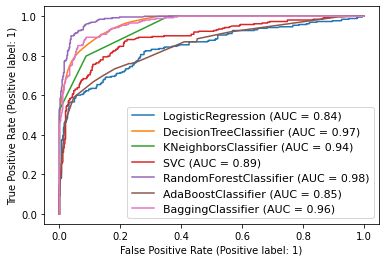

In [266]:
disp=plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(dt,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(adc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(bc,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

ROC CURVE FOR TESTING

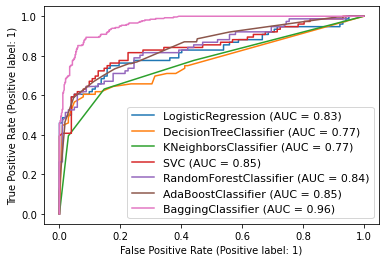

In [267]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(bc,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

CONCLUSION
-----------------------


SINCE SVC HAVE HIGH VALUES FOR ACCURACIES FOR BOTH TRAINING AND TESTING AND THERE IS A VERY LESS DIFFERENCE BETWEEN CROSS VAL SCORE ,ACCURAY SCORE FOR TRAINING AND TESTING SCORE FOR TESTING WE WILL PROCEED WITH THIS MODEL


saving the model
-----------------------

In [268]:
import pickle


In [269]:
with open('svc_model_pkl', 'wb') as files:
    pickle.dump(svc, files)

loading the model
----------------------


In [270]:
with open('svc_model_pkl' , 'rb') as f:
    svv = pickle.load(f)